# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

The degree of freedom is 3, k = 3.

**b)** Why is it bad for a model to have too many degrees of freedom?

It can cause the model to overfit and have high variance.

**c)** Why is it bad for a model to have too few degrees of freedom?

It can underfit due to not be able to capture underlying relationships in the data. In addition it can have bad generalization. 

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

$$
H = X(X^TX + \lambda I)^{-1}X^T
$$

**e)** Why might we want to use Ridge regression instead of OLS?
Ridge has a regularization term which is useful in several cases, such as when variables are highly correlated, where OLS can lead to bad coefficient estimates. On the other hand, Ridge regression would reduce the impact of the correcation by stabilizing the estimates. Similarly, with overfitting and high dimensional data. 


**f)** Why migth we want to use OLS instead of Ridge regression?

OLS is a simpler approach, it is a linear model which represents directly the relationship between the dependent and independent variables. 


## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

$$
{\displaystyle 
\min_{\boldsymbol{\beta}\in \mathbb{R}^p}}
\;\; \frac{1}{2n}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^{T}
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)
+ \frac{\lambda}{2}\,\boldsymbol{\beta}^T \boldsymbol{\beta}.
$$

---

### Expand the quadratic

$$
\begin{aligned}
\mathcal{L}(\boldsymbol{\beta})
&= \frac{1}{2n}\Big(
\boldsymbol{y}^T\boldsymbol{y}
-2\,\boldsymbol{y}^T\boldsymbol{X}\boldsymbol{\beta}
+\boldsymbol{\beta}^T\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}
\Big)
+ \frac{\lambda}{2}\,\boldsymbol{\beta}^T \boldsymbol{\beta}.
\end{aligned}
$$

---

### Gradient w.r.t. \( \beta \)

$$
\nabla_{\beta}\mathcal{L}(\beta)
= \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}
-\frac{1}{n}\boldsymbol{X}^T\boldsymbol{y}
+\lambda \boldsymbol{\beta}.
$$

---

### First-order optimality condition

$$
\Big(\tfrac{1}{n}\boldsymbol{X}^T\boldsymbol{X}+\lambda \boldsymbol{I}\Big)\hat{\boldsymbol{\beta}}
= \tfrac{1}{n}\boldsymbol{X}^T\boldsymbol{y}.
$$

Multiply both sides by \(n\):

$$
\big(\boldsymbol{X}^T\boldsymbol{X}+n\lambda \boldsymbol{I}\big)\hat{\boldsymbol{\beta}}
= \boldsymbol{X}^T \boldsymbol{y}.
$$

---

### Ridge solution

$$
\hat{\boldsymbol{\beta}}_{\text{Ridge}}
= \big(\boldsymbol{X}^T\boldsymbol{X}+n\lambda \boldsymbol{I}\big)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

## Exercise 3 - Scaling data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [7]:
def polynomial_features(x, p, intercept=True):
    n = len(x)
    # if intercept, we need p+1 columns, else just p
    X = np.zeros((n, p + 1 if intercept else p))
    
    if intercept:
        X[:, 0] = 1  # column of ones
        for i in range(1, p + 1):
            X[:, i] = x ** i
    else:
        for i in range(p):
            X[:, i] = x ** (i + 1)
    
    return X


In [8]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    X = np.zeros((n, p))
    X[:, 0] = x[:]
    X[:, 1] = x**2
    X[:, 2] = x**3
    return X

**b)** Split your data into training and test data(80/20 split)

In [9]:
X = polynomial_features(x, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [13]:
def Ridge_parameters(X, y, lambda_):

    I = np.eye(X.shape[1])  # Identity matrix of size (n_features, n_features)
    
    # Ridge formula
    beta_ridge = np.linalg.inv(X.T @ X + lambda_ * I) @ (X.T @ y)
    
    return beta_ridge

lambda_ = 0.1  # Regularization parameter
beta = Ridge_parameters(X_train_s, y_train, lambda_)

print("Ridge regression coefficients:", beta)


Ridge regression coefficients: [ 0.84198043 -0.13481634 -0.42057073]


**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

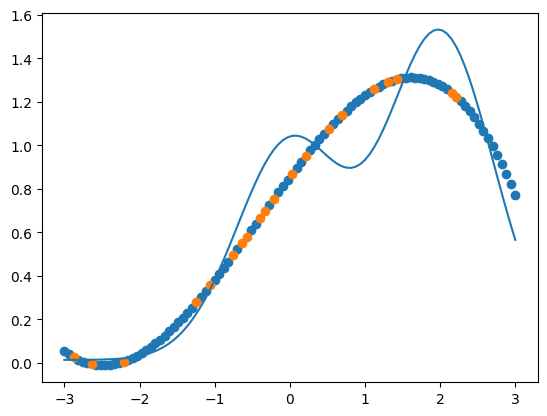

In [ ]:
x_train_original = x_train  
x_test_original = x_test 

plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)
   


## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

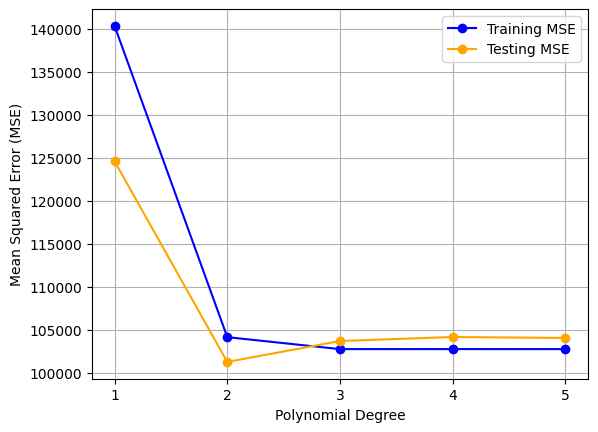

In [ ]:
# Task 4a)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

x = np.linspace(0, 10, 100)
y = 2 * (x ** 3) - 6 * (x ** 2) + np.random.normal(0, 5, size=x.shape)  


mse_train = []
mse_test = []

lambda_ = 0.01

# Loop over polynomial degrees from 1 to 5
for degree in range(1, 6):

    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(x.reshape(-1, 1))  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the feature design matrix using StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)  # Transform training data
    X_test_s = scaler.transform(X_test)      # Transform test data


    def Ridge_parameters(X, y, lambda_):
        I = np.eye(X.shape[1])  # Create identity matrix
        beta_ridge = np.linalg.inv(X.T @ X + lambda_ * I) @ (X.T @ y)  
        return beta_ridge

    # Fit the Ridge model
    beta = Ridge_parameters(X_train_s, y_train, lambda_)


    y_train_pred = X_train_s @ beta
    y_test_pred = X_test_s @ beta

    # Compute the MSE for training and testing sets
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

plt.plot(range(1, 6), mse_train, marker='o', label='Training MSE', color='blue')
plt.plot(range(1, 6), mse_test, marker='o', label='Testing MSE', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, 6))
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Task 4 b)
degree = 3
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x.reshape(-1, 1))  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)  
X_test_s = scaler.transform(X_test)   

lambda_values = np.logspace(-1, -5, num=5)  

mse_train = []
mse_test = []


for lambda_ in lambda_values:
    beta = Ridge_parameters(X_train_s, y_train, lambda_)

    y_train_pred = X_train_s @ beta
    y_test_pred = X_test_s @ beta

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))


plt.plot(lambda_values, mse_train, marker='o', label='Training MSE', color='blue')
plt.plot(lambda_values, mse_test, marker='o', label='Testing MSE', color='orange')
plt.xscale('log')  
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()


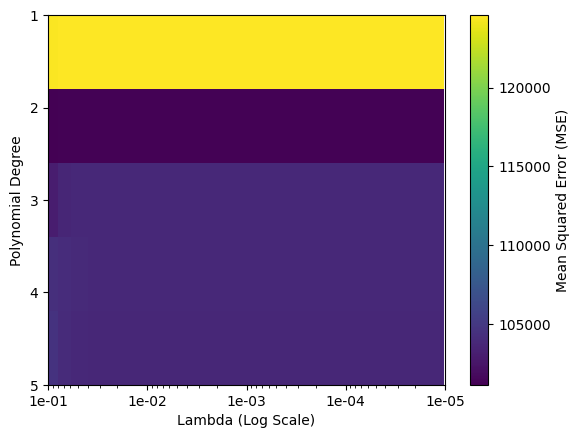

In [23]:
# Task 4 c)

lambda_values = np.logspace(-1, -5, num=5) 
degrees = [1, 2, 3, 4, 5]

mse_results = np.zeros((len(degrees), len(lambda_values)))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(x.reshape(-1, 1))  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)

    for j, lambda_ in enumerate(lambda_values):
        beta = Ridge_parameters(X_train_s, y_train, lambda_) 
        y_test_pred = X_test_s @ beta

        mse_results[i, j] = mean_squared_error(y_test, y_test_pred)


plt.imshow(mse_results, extent=[lambda_values[0], lambda_values[-1], degrees[-1], degrees[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='Mean Squared Error (MSE)')
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Polynomial Degree')
plt.xscale('log') 
plt.xticks(lambda_values, [f'{l:.0e}' for l in lambda_values]) 
plt.yticks(degrees)
plt.grid(False)
plt.show()
